# Imports

In [1]:
import pandas as pd
import pathlib
import string
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import operator
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import csv

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy

# Functions

In [2]:
#converting a dataframe into a single list 
#text is split into words defined by their space inbetween
#words are inserted into list 



def words_list(text):
    #words are inserted into list 
    corpus=[]
    for row in text:
        tokens = row[0].split(" ")
        for token in tokens:
            corpus.append(token)
    
    
    def vocabulary_list(corpus):
        #initlialize the vocabulary
        vocab = list(set(" ".join(corpus)))
        vocab.remove(' ')
        return vocab
      
    
    def split_words_char(corpus):
        #split the word into characters
        corpus = [" ".join(token) for token in corpus]
        #appending </w>
        corpus=[token+' </w>' for token in corpus]
        return corpus
        
    x,y = split_words_char(corpus), vocabulary_list(corpus)
    return x,y


def del_punctuations(words):
    punctuation_table = str.maketrans('', '', string.punctuation)
    words = [word.translate(punctuation_table).lower() for word in words]
    return words

def token_sentences(text):
    sentences = sent_tokenize(text)
    return sentences


def tokenization(words, text):
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]   
    return words


def stop_words(words):
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    return words



def word_frequency(words):
    frequency_words = collections.Counter(words)
    
    #convert counter object to dictionary
    frequency_words_dict = dict(frequency_words)
    res = dict(sorted(frequency_words_dict.items(), key=lambda item: item[1]))
    return res

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    return df

def top_20_most_common_words(freq_words):
    res = dict(Counter(freq_words).most_common(20))
    return res

def most_common_words(dictionary):
    # Output a dict of most common words
    return dict(sorted(dictionary.items(),key=lambda x: x[1], reverse=True))

def least_common_words(dictionary):
    return sorted(list(dictionary.items()),key=lambda x: x[1])

# number of tokens, sentences, average tokens, total unique tokens, total number of tokens after cleaning

def basic_statistics(text,printer = False):
    sents = nltk.sent_tokenize(text)
    tokens = word_tokenize(text[1:])
    words = [token.lower() for token in tokens if token.isalpha()]
    average_tokens = round(len(words)/len(sents))
    unique_tokens = set(words)
    token_ratio = round(len(unique_tokens)/len(tokens),3)
    stop_words = set(stopwords.words('english'))
    final_tokens = []
    for each in words:
        if each not in stop_words:
            final_tokens.append(each)
    if printer == True:
        print(f'The number of characters: {len(text)}')
        print(f'The number of tokens is: {len(tokens)}')
        print(f'The number of sentences is: {len(sents)}')
        print(f'The average number of tokens per sentence is: {average_tokens}')
        print(f'The number of unique tokens are: {len(unique_tokens)}')
        print(f'The tokens ratio is: {token_ratio}')
        print(f'The number of total tokens after removing stopwords are: {len(final_tokens)}')
    return len(text), len(tokens), len(sents), average_tokens, len(unique_tokens), token_ratio, len(final_tokens)

# Function for loglog plots
def llplot(list_var, labels, title):
    """Function that takes a list of datasets, list of labels and a title as string, and plots a loglogplot, example:
    llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], ["val", "train", "test"], "Offensive dataset, loglog plot")
    """
    # Size of the figure:
    plt.figure(figsize = (7,6))
    # Iterating through the datasets:
    for idx, i in enumerate(list_var):
        y = np.log(list(most_common_words(i).values()))
        x = np.log([i for i in range(1,len(y)+1)])
        plt.scatter(x, y, label = labels[idx])
    # Labeling title and axis:
    plt.title(title)
    plt.xlabel("Rank of word")
    plt.ylabel("Frequency of word")
    # Plotting:
    plt.legend()
    plt.show()
    return None



# TASK 1.1: TOKENIZATION
_ splitting text files into words _


## Text file: Emoji

### Read in txt files: offensive/emoji.txt

In [3]:
file_path_val = pathlib.Path(r'datasets/emoji/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    emoji_text_val = f.read()       
    f.close()
    
emoji_words_val_txt = emoji_text_val[1:].split()

print(emoji_words_val_txt[:100])

['little', 'throwback', 'with', 'my', 'favourite', 'person', '@', 'Water', 'Wall', 'glam', 'on', '@user', 'yesterday', 'for', '#kcon', 'makeup', 'using', '@user', 'in', '#featherette,…', 'Democracy', 'Plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', '#Decision2016', '@', 'NBC', 'News', 'Then', '&amp;', 'Now.', 'VILO', '@', 'Walt', 'Disney', 'Magic', 'Kingdom', 'Who', 'never...', '@', 'A', 'Galaxy', 'Far', 'Far', 'Away', 'Dinner', 'in', 'FLA', 'tonight', '//', 'Pan-seared', 'salmon', 'over', 'couscous', 'veggie', 'salad', '#yum', '#dinner', '#florida', '#salmon…', "It's", 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '@', 'West', 'Salem…', 'I', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '@', 'Phi', 'Mu', 'at', 'JSU', "'Cause", 'I', 'Miss', 'My', 'Little', 'Homies', '.#Throwback']


In [4]:
file_path_train = pathlib.Path(r'datasets/emoji/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    emoji_text_train = f.read()       
    f.close()
    
emoji_words_train_txt = emoji_text_train[1:].split()
print(emoji_words_train_txt[:100])

['unday', 'afternoon', 'walking', 'through', 'Venice', 'in', 'the', 'sun', 'with', '@user', '️', '️', '️', '@', 'Abbot', 'Kinney,', 'Venice', 'Time', 'for', 'some', 'BBQ', 'and', 'whiskey', 'libations.', 'Chomp,', 'belch,', 'chomp!', '(@', "Lucille's", 'Smokehouse', 'Bar-B-Que)', 'Love', 'love', 'love', 'all', 'these', 'people', '️', '️', '️', '#friends', '#bff', '#celebrate', '#blessed', '#sundayfunday', '@', 'San…', '️', '️', '️', '️', '@', 'Toys"R"Us', 'Man', 'these', 'are', 'the', 'funniest', 'kids', 'ever!!', 'That', 'face!', '#HappyBirthdayBubb', '@', 'FLIPnOUT', 'Xtreme', '#sandiego', '@', 'San', 'Diego,', 'California', 'My', 'little', '️', '️', '️', '️', '️', '#ObsessedWithMyDog', '@', 'Cafe', 'Solstice', 'Capitol', 'Hill', 'More', '#tinyepic', 'things', '#tinyepicwestern,', 'this', 'one', 'is', 'crazy', '@user', 'I', 'may', 'be', 'one', 'of', 'your…', 'Last']


In [5]:
file_path_test = pathlib.Path(r'datasets/emoji/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    emoji_text_test = f.read()       
    f.close()
    
emoji_words_test_txt = emoji_text_test[1:].split()
print(emoji_words_test_txt[:100])

['n', 'Pelham', 'Parkway', 'The', 'calm', 'before......', '|', 'w/', 'sofarsounds', '@user', '|', ':', 'B.', 'Hall.......#sofarsounds…', 'Just', 'witnessed', 'the', 'great', 'solar', 'eclipse', '@', 'Tampa,', 'Florida', 'This', 'little', 'lady', 'is', '26', 'weeks', 'pregnant', 'today!', 'Excited', 'for', 'baby', 'Cam', 'to', 'come!', '@', 'Springfield,…', 'Great', 'road', 'trip', 'views!', '@', 'Shartlesville,', 'Pennsylvania', 'CHRISTMAS', 'DEALS', 'BUY', 'ANY', '3', 'SMALL', 'POMADES', '1.5', 'OR', '1.7', 'OZ', 'RECEIVE', 'THE', 'F&amp;S', 'COLLECTOR', 'TIN', '&amp;', 'COMB…', 'the', '#sisterstunt', 'was', 'mad', 'real', 'last', 'night', '#MiaStaxxx', '#AndreaStaxxx', '#denverqueen', '#staxxxlife…', "I'm", 'starting', 'to', 'love', 'shooting', 'in', 'the', 'dark', '#brandonwolfel', '@', 'New', 'York,', 'New', 'York', 'Let', 'the', 'sun', 'shine', 'through', '️', '5x5', 'Feet', '#oilpainting', '#oiloncanvas', '#acrylicpainting']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [6]:


emoji_cleaned_val_words = del_punctuations(emoji_words_val_txt)
emoji_cleaned_train_words = del_punctuations(emoji_words_train_txt)
emoji_cleaned_test_words = del_punctuations(emoji_words_test_txt)

print('val_text.txt:\n',emoji_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',emoji_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',emoji_cleaned_test_words[:100],'\n')

val_text.txt:
 ['little', 'throwback', 'with', 'my', 'favourite', 'person', '', 'water', 'wall', 'glam', 'on', 'user', 'yesterday', 'for', 'kcon', 'makeup', 'using', 'user', 'in', 'featherette…', 'democracy', 'plaza', 'in', 'the', 'wake', 'of', 'a', 'stunning', 'outcome', 'decision2016', '', 'nbc', 'news', 'then', 'amp', 'now', 'vilo', '', 'walt', 'disney', 'magic', 'kingdom', 'who', 'never', '', 'a', 'galaxy', 'far', 'far', 'away', 'dinner', 'in', 'fla', 'tonight', '', 'panseared', 'salmon', 'over', 'couscous', 'veggie', 'salad', 'yum', 'dinner', 'florida', 'salmon…', 'its', 'my', 'fav', 'seniors', 'last', 'game', 'congrats', 'on', 'beating', 'west', '', 'west', 'salem…', 'i', 'got', 'to', 'to', 'go', 'formal', 'with', 'my', 'best', 'friend', '', 'phi', 'mu', 'at', 'jsu', 'cause', 'i', 'miss', 'my', 'little', 'homies', 'throwback'] 


val_train.txt:
 ['unday', 'afternoon', 'walking', 'through', 'venice', 'in', 'the', 'sun', 'with', 'user', '️', '️', '️', '', 'abbot', 'kinney', 'venice

In [7]:

#nltk.download('punkt')



emoji_sentences_val_txt = token_sentences(emoji_text_val)   
emoji_sentences_train_txt = token_sentences(emoji_text_train)
emoji_sentences_test_txt = token_sentences(emoji_text_test)   

print(emoji_sentences_val_txt[:5])
print(emoji_sentences_train_txt[:5])
print(emoji_sentences_test_txt[:5])

['A little throwback with my favourite person @ Water Wall\nglam on @user yesterday for #kcon makeup using @user in #featherette,…\nDemocracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News\nThen &amp; Now.', "VILO @ Walt Disney Magic Kingdom\nWho never... @ A Galaxy Far Far Away\nDinner in FLA tonight // Pan-seared salmon over couscous veggie salad #yum #dinner #florida #salmon…\nIt's my fav seniors last game congrats on beating west @ West Salem…\nI got to to go formal with my best friend @ Phi Mu at JSU\n'Cause I Miss My Little Homies .#Throwback #CousinLove @ Indiana University\nBirthday Kisses @ Madison, Wisconsin\nGreat time in Tuscaloosa with my girl!", '@ Bryant–Denny Stadium\nA seguir aprendiendo del mundo de las berries (@ John F. Kennedy International Airport (JFK) in Queens, NY, NY)\n#livinginparadise @ Ramada Plaza Beach Resort\n••In order for your life to be "GREAT" you must first learn to "APPRECIATE" it... •• #Ny…\nThese girls!', '#seniors2016 #memories

### Number of words in each tokenization variables

In [8]:

emoji_token_val = tokenization(emoji_cleaned_val_words, emoji_text_val)
emoji_token_train = tokenization(emoji_cleaned_train_words, emoji_text_train)
emoji_token_test = tokenization(emoji_cleaned_test_words, emoji_text_test)

print(f'Number of words in tokenization for val_text: {len(emoji_token_val)}')
print(f'Number of words in tokenization for val_train: {len(emoji_token_train)}')
print(f'Number of words in tokenization for val_test: {len(emoji_token_test)}')

Number of words in tokenization for val_text: 49591
Number of words in tokenization for val_train: 460902
Number of words in tokenization for val_test: 517054


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [9]:
emoji_cleaned_val_words = stop_words(emoji_token_val)
emoji_cleaned_train_words = stop_words(emoji_token_train)
emoji_cleaned_test_words = stop_words(emoji_token_test)

print(f'Number of words after removing Stop Words: {len(emoji_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(emoji_cleaned_test_words)}')


Number of words after removing Stop Words: 33580
Number of words after removing Stop Words: 314127
Number of words after removing Stop Words: 345189


### Frequency of each word

In [10]:
import collections

#returns frequency of each word



emoji_freq_words_val = word_frequency(emoji_cleaned_val_words)
emoji_freq_words_train = word_frequency(emoji_cleaned_train_words)
emoji_freq_words_test = word_frequency(emoji_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(emoji_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(emoji_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(emoji_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('friends', 76), ('high', 76), ('much', 78), ('fun', 78), ('first', 79), ('school', 81), ('life', 82), ('thank', 82), ('thanks', 86), ('center', 87), ('california', 87), ('see', 87), ('get', 89), ('city', 91), ('great', 96), ('back', 96), ('ca', 98), ('little', 99), ('university', 103), ('beautiful', 106), ('christmas', 116), ('like', 118), ('birthday', 119), ('last', 120), ('one', 125), ('today', 133), ('best', 136), ('got', 137), ('time', 137), ('good', 137), ('beach', 147), ('york', 148), ('night', 151), ('park', 152), ('day', 223), ('happy', 225), ('amp', 245), ('new', 292), ('love', 389)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('city', 736), ('francisco', 746), ('great', 751), ('fun', 756), ('little', 778), ('see', 783), (

### Vocabulary list for offensive text files
_Looking through vocabulary lists can help you find problems
(especially tokens that only occur once or twice)._

In [11]:


emoji_corpus_val, emoji_vocab_val = words_list(emoji_text_val)
emoji_corpus_train, emoji_vocab_train = words_list(emoji_text_train)
emoji_corpus_test, emoji_vocab_test = words_list(emoji_text_test)

print('Vocabulary for text_val.txt:\n', emoji_vocab_val[:20],'\n')
print('Vocabulary for text_train.txt:\n', emoji_vocab_train[:20],'\n')
print('Vocabulary for text_test.txt:\n', emoji_vocab_test[:20],'\n')

Vocabulary for text_val.txt:
 ['V', 'Y', '海', 'p', 's', '3', '€', 'P', '재', '0', ';', 'I', '*', '(', 'ン', 'Ä', 'Σ', 'ñ', 'v', '범'] 

Vocabulary for text_train.txt:
 ['V', '🇺', '엄', 'Y', 'p', 'ò', 'ر', 's', '*', 'Π', 'л', '廳', 'ク', 'ю', '先', 'v', '니', 'ม', '—', 'ว'] 

Vocabulary for text_test.txt:
 ['🄻', 'V', '🇺', 'ท', '엄', '角', '翔', 'ハ', 'Y', 'p', 'ò', 'ر', 's', '帶', '*', '⇨', 'л', '仙', 'v', 'ม'] 



### Read in txt files: offensive/val_text.txt

In [12]:
#offensive_

In [13]:
file_path_val = pathlib.Path(r'datasets/offensive/val_text.txt')

with open(file_path_val, 'r',encoding="utf8") as f:
    offensive_text_val = f.read()       
    f.close()
    
offensive_words_val_txt = offensive_text_val[1:].split()

print(offensive_words_val_txt[:100])

['user', '@user', 'WiiU', 'is', 'not', 'even', 'a', 'real', 'console.', '@user', '@user', '@user', 'If', 'he', 'is', 'from', 'AZ', 'I', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids.', '@user', 'I', 'thought', 'Canada', 'had', 'strict', 'gun', 'control.', 'Help', 'me', 'understand', 'what', 'is', 'happening.', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', '@user', 'Following', 'all', '#Maga', 'patriots', 'please', 'follow', 'back', '👍', '#LionsDen', '🦁', '#MAGA2KAG', '🇺🇸', '1', 'Minute', 'of', 'Truth:', 'Gun', 'Control', 'via', '@user', '@user', '@user', '@user', 'We', 'could', 'help', 'if', 'you', 'are', 'London', 'based', '😊', '@user', '@user', 'There', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the']


In [14]:
file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')


with open(file_path_train, 'r',encoding="utf8") as f:
    offensive_text_train = f.read()       
    f.close()
    
offensive_words_train_txt = offensive_text_train[1:].split()
print(offensive_words_train_txt[:100])

['user', 'Bono...', 'who', 'cares.', 'Soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity.', 'Become', 'a', 'Leader', 'of', 'your', 'people', 'instead', 'or', 'help', 'and', 'support', 'your', 'fellow', 'countrymen.', '@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama’s', 'picks.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president.', '@user', 'Get', 'him', 'some', 'line', 'help.', 'He', 'is', 'gonna', 'be', 'just', 'fine.', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads.', 'He', 'brought', 'what', 'has', 'been', 'missing.', 'The', 'deep', 'ball', 'presence.', 'Now', 'he', 'just', 'needs', 'a', 'little', 'more', 'time', '@user', '@user', 'She', 'is', 'great.', 'Hi', 'Fiona!', '@user']


In [15]:
file_path_test = pathlib.Path(r'datasets/offensive/test_text.txt')


with open(file_path_test, 'r',encoding="utf8") as f:
    offensive_text_test = f.read()       
    f.close()
    
offensive_words_test_txt = offensive_text_test[1:].split()
print(offensive_words_test_txt[:100])

['ibelieveblaseyford', 'is', 'liar', 'she', 'is', 'fat', 'ugly', 'libreal', '#snowflake', 'she', 'sold', 'her', 'herself', 'to', 'get', 'some', 'cash', '!!', 'From', 'dems', 'and', 'Iran', '!', 'Why', 'she', 'spoke', 'after', '#JohnKerryIranMeeting', '?', '@user', '@user', '@user', 'I', 'got', 'in', 'a', 'pretty', 'deep', 'debate', 'with', 'my', 'friend', 'and', 'she', 'told', 'me', 'that', 'latinos', 'for', 'Trump', 'and', 'blacks', 'for', 'Trump', 'were', 'paid', 'supporters', '😂', 'then', 'I', 'said', 'you', 'mean', 'antifa', 'are', 'paid', 'domestic', 'terrorist', 'and', 'she', 'said', 'No', 'they', 'are', 'anti-fascist', 'then', 'I', 'said', 'they', 'are', 'the', 'fascist', 'are', 'you', 'kidding', 'me?!', '...if', 'you', 'want', 'more', 'shootings', 'and', 'more', 'death,', 'then', 'listen', 'to', 'the', 'ACLU,', 'Black']


### Remove punctuations from txt files
_ meaning signs, spacing and other disturbing features. Alle words are then turned into lower cases_

In [16]:

offensive_cleaned_val_words = del_punctuations(offensive_words_val_txt)
offensive_cleaned_train_words = del_punctuations(offensive_words_train_txt)
offensive_cleaned_test_words = del_punctuations(offensive_words_test_txt)

print('val_text.txt:\n',offensive_cleaned_val_words[:100],'\n')

print('\nval_train.txt:\n',offensive_cleaned_train_words[:100], '\n')

print('\nval_test.txt:\n',offensive_cleaned_test_words[:100],'\n')

val_text.txt:
 ['user', 'user', 'wiiu', 'is', 'not', 'even', 'a', 'real', 'console', 'user', 'user', 'user', 'if', 'he', 'is', 'from', 'az', 'i', 'would', 'put', 'my', 'money', 'on', 'sex', 'with', 'underage', 'kids', 'user', 'i', 'thought', 'canada', 'had', 'strict', 'gun', 'control', 'help', 'me', 'understand', 'what', 'is', 'happening', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'following', 'all', 'maga', 'patriots', 'please', 'follow', 'back', '👍', 'lionsden', '🦁', 'maga2kag', '🇺🇸', '1', 'minute', 'of', 'truth', 'gun', 'control', 'via', 'user', 'user', 'user', 'user', 'we', 'could', 'help', 'if', 'you', 'are', 'london', 'based', '😊', 'user', 'user', 'there', 'r', '65', 'million', 'that', 'can', 'sign', 'to', 'the'] 


val_train.txt:
 ['user', 'bono', 'who', 'cares', 'soon', 'people', 'will', 'understand', 'that', 'they', 'gain', 'nothing', 'from', 'following', 'a', 'phony', 'celebrity', 'become', 

### Number of words in each tokenization variables

In [17]:
from nltk.tokenize import word_tokenize


offensive_token_val = tokenization(offensive_cleaned_val_words, offensive_text_val)
offensive_token_train = tokenization(offensive_cleaned_train_words, offensive_text_train)
offensive_token_test = tokenization(offensive_cleaned_test_words, offensive_text_test)

print(f'Number of words in tokenization for val_text: {len(offensive_token_val)}')
print(f'Number of words in tokenization for val_train: {len(offensive_token_train)}')
print(f'Number of words in tokenization for val_test: {len(offensive_token_test)}')

Number of words in tokenization for val_text: 30416
Number of words in tokenization for val_train: 258224
Number of words in tokenization for val_test: 19619


### Removing stopwords like 'and, or, of, is, had.... etc' 

In [18]:
from nltk.corpus import stopwords


offensive_cleaned_val_words = stop_words(offensive_token_val)
offensive_cleaned_train_words = stop_words(offensive_token_train)
offensive_cleaned_test_words = stop_words(offensive_token_test)

print(f'Number of words after removing Stop Words: {len(offensive_cleaned_val_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_train_words)}')
print(f'Number of words after removing Stop Words: {len(offensive_cleaned_test_words)}')


Number of words after removing Stop Words: 17155
Number of words after removing Stop Words: 147302
Number of words after removing Stop Words: 11080


### Frequency of each word

In [19]:
import collections

#returns frequency of each word
offensive_freq_words_val = word_frequency(offensive_cleaned_val_words)
offensive_freq_words_train = word_frequency(offensive_cleaned_train_words)
offensive_freq_words_test = word_frequency(offensive_cleaned_test_words)


print('_'*112,'\n')
print('Frequency of words in val_text:\n',list(offensive_freq_words_val.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in train_text:\n',list(offensive_freq_words_train.items())[-40:-1], '\n')
print('_'*112,'\n')
print('Frequency of words in test_text:\n',list(offensive_freq_words_test.items())[-40:-1], '\n')
print('_'*112,'\n')

________________________________________________________________________________________________________________ 

Frequency of words in val_text:
 [('love', 31), ('great', 31), ('much', 32), ('democrats', 32), ('country', 32), ('could', 33), ('vote', 33), ('shit', 33), ('never', 35), ('believe', 35), ('way', 35), ('need', 36), ('say', 37), ('still', 38), ('time', 40), ('make', 40), ('go', 41), ('good', 42), ('even', 43), ('see', 44), ('right', 45), ('going', 47), ('us', 52), ('want', 55), ('would', 61), ('amp', 62), ('think', 68), ('trump', 69), ('one', 71), ('get', 73), ('know', 77), ('people', 89), ('maga', 98), ('conservatives', 107), ('like', 109), ('antifa', 118), ('control', 125), ('gun', 133), ('liberals', 137)] 

________________________________________________________________________________________________________________ 

Frequency of words in train_text:
 [('better', 237), ('vote', 237), ('well', 240), ('much', 249), ('left', 252), ('still', 262), ('make', 276), ('way', 2

# My approach to task 1

In [20]:
#This is the ideal tokenization from the library we were supposed to compare it with
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

sentence = 'Heroin is my passion.'

tknzr.tokenize(sentence)

['Heroin', 'is', 'my', 'passion', '.']

In [21]:
#Recreate
import re
import pathlib

file_path_train = pathlib.Path(r'datasets/offensive/train_text.txt')

token_pattern = re.compile(r'\w+')

with open(file_path_train, 'r',encoding="utf8") as f:
    line = f.readline()
    tokens = []
    while line:
        line = f.readline()
        print(line)
        print("OUR beta tokenizer",re.findall(token_pattern,line))
        print("DESIRED  tokenizer",tknzr.tokenize(line))
        print('\n')
    

@user Eight years the republicans denied obama’s picks. Breitbarters outrage is as phony as their fake president. 

OUR beta tokenizer ['user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', 's', 'picks', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president']
DESIRED  tokenizer ['@user', 'Eight', 'years', 'the', 'republicans', 'denied', 'obama', '’', 's', 'picks', '.', 'Breitbarters', 'outrage', 'is', 'as', 'phony', 'as', 'their', 'fake', 'president', '.']


@user Get him some line help. He is gonna be just fine. As the game went on you could see him progressing more with his reads. He brought what has been missing. The deep ball presence. Now he just needs a little more time 

OUR beta tokenizer ['user', 'Get', 'him', 'some', 'line', 'help', 'He', 'is', 'gonna', 'be', 'just', 'fine', 'As', 'the', 'game', 'went', 'on', 'you', 'could', 'see', 'him', 'progressing', 'more', 'with', 'his', 'reads', 'He', 'brought', 'what', 'has', 'been', 'missing', 

DESIRED  tokenizer ['@user', '@user', 'this', 'is', 'all', 'just', 'another', 'fraud', 'put', 'out', 'by', 'the', 'democrats.this', 'woman', 'is', 'lying', 'to', 'help', 'her', 'party.Nothing', 'but', 'a', 'liberal', 'nutjob', 'who', 'would', 'say', 'anything', 'to', 'try', 'and', 'keep', 'the', 'conservatives', 'from', 'having', 'the', 'majority', 'on', 'the', 'SCOTUS', '.']


@user Just focus on Price stats when he is behind the plate....😉 

OUR beta tokenizer ['user', 'Just', 'focus', 'on', 'Price', 'stats', 'when', 'he', 'is', 'behind', 'the', 'plate']
DESIRED  tokenizer ['@user', 'Just', 'focus', 'on', 'Price', 'stats', 'when', 'he', 'is', 'behind', 'the', 'plate', '...', '😉']


@user What the fuck game are you watching? 

OUR beta tokenizer ['user', 'What', 'the', 'fuck', 'game', 'are', 'you', 'watching']
DESIRED  tokenizer ['@user', 'What', 'the', 'fuck', 'game', 'are', 'you', 'watching', '?']


@user liberals have turned everything into a 3 ring circus. 

OUR beta tokenizer ['u

DESIRED  tokenizer ['@user', '@user', 'The', 'name', 'alt', 'right', 'is', 'to', 'make', 'people', 'think', 'its', 'a', 'right', 'wing', 'group.just', 'like', 'ANTIFA', 'that', 'are', 'fascist', '.', 'BLM', 'that', 'really', 'to', 'they', 'all', 'black', 'lives', 'dont', 'matter', '.']


@user @user The truth of it is that unless she has evidence than it's only allegations! If there is no proof than it is only 'what she says' against 'what he says'! She doesn't get marks for truthfulness just because she is a woman; because women can lie just as quickly as a man can! 

OUR beta tokenizer ['user', 'user', 'The', 'truth', 'of', 'it', 'is', 'that', 'unless', 'she', 'has', 'evidence', 'than', 'it', 's', 'only', 'allegations', 'If', 'there', 'is', 'no', 'proof', 'than', 'it', 'is', 'only', 'what', 'she', 'says', 'against', 'what', 'he', 'says', 'She', 'doesn', 't', 'get', 'marks', 'for', 'truthfulness', 'just', 'because', 'she', 'is', 'a', 'woman', 'because', 'women', 'can', 'lie', 'just', 

DESIRED  tokenizer ['@user', '@user', 'It', 'also', 'means', 'her', 'treacherous', 'actions', 'will', 'seriously', 'offend', '70', '%', 'of', '@user', 'who', 'voted', 'to', '#Leave', 'all', '*', 'Four', 'Pillars', '*', 'of', 'the', 'CORRUPT', '#EU', '.', '#ChuckMay', '#ChuckChequers', '#BoJo4PM']


@user FASCIST LEFT ARE EVERYWHERE. We must crush them; boycotts work folks. 

OUR beta tokenizer ['user', 'FASCIST', 'LEFT', 'ARE', 'EVERYWHERE', 'We', 'must', 'crush', 'them', 'boycotts', 'work', 'folks']
DESIRED  tokenizer ['@user', 'FASCIST', 'LEFT', 'ARE', 'EVERYWHERE', '.', 'We', 'must', 'crush', 'them', ';', 'boycotts', 'work', 'folks', '.']


The GOP has two choices: 1) Confirm Kavanauh &amp; possibly lose the house. 2) Dump Kavanauh definitely lose the house &amp; have their supporters #WalkAway   #MAGA  #DoTheRightThing  #ConfirmKavanaugh 

OUR beta tokenizer ['The', 'GOP', 'has', 'two', 'choices', '1', 'Confirm', 'Kavanauh', 'amp', 'possibly', 'lose', 'the', 'house', '2', 'Dump', '



@user @user The purrfect portrait! She even has her tail wrapped around her paws! She is beautiful in this shot! 

OUR beta tokenizer ['user', 'user', 'The', 'purrfect', 'portrait', 'She', 'even', 'has', 'her', 'tail', 'wrapped', 'around', 'her', 'paws', 'She', 'is', 'beautiful', 'in', 'this', 'shot']
DESIRED  tokenizer ['@user', '@user', 'The', 'purrfect', 'portrait', '!', 'She', 'even', 'has', 'her', 'tail', 'wrapped', 'around', 'her', 'paws', '!', 'She', 'is', 'beautiful', 'in', 'this', 'shot', '!']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user PC or not has NOTHING to do with common decency...🙄 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 

OUR beta tokenizer ['user', 'God', 'help', 'us']
DESIRED  tokenizer ['@user', 'God', 'help', 'us']


@user @user @user @user @user @user Congratulations! 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'Congratulations']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', 'Congratulations', '!']


@user Maybe he should have used some of your peers? 

OUR beta tokenizer ['user', 'Maybe', 'he', 'should', 'have', 'used', 'some', 'of', 'your', 'peers']
DESIRED  tokenizer ['@user', 'Maybe', 'he', 'should', 'have', 'used', 'some', 'of', 'your', 'peers', '?']


@user @user @user @user Ooh but coming from Mr.Rapist  We are all the same alias and one person   A 55yr old Antifa Granny  Go Figure   Sept.30th couldn't come anytime sooner isn't that right Brother (Grok)  Old toothless will be getting a  rude awakening along with his Housewives 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'Ooh', 'but', 'coming', 'from', 'Mr', 'Rapist', 'We', 'are'

OUR beta tokenizer ['user', 'Would', 'you', 'resign', 'with', 'the', 'boys', 'Just', 'curious', 'and', 'honest', 'question', 'have', 'you', 'gained', 'any', 'perspective', 'of', 'why', 'yall', 'parted', 'ways', 'Being', 'serious', 'cuz', 'you', 'are', 'a', 'BAD', 'positive', 'receiver']
DESIRED  tokenizer ['@user', 'Would', 'you', 'resign', 'with', 'the', 'boys', '?', 'Just', 'curious', 'and', 'honest', 'question', 'have', 'you', 'gained', 'any', 'perspective', 'of', 'why', 'yall', 'parted', 'ways', '?', 'Being', 'serious', 'cuz', 'you', 'are', 'a', 'BAD', '(', 'positive', ')', 'receiver', '!']


@user @user Several of the western liberals are not too happy with national focus of Saudi. 

OUR beta tokenizer ['user', 'user', 'Several', 'of', 'the', 'western', 'liberals', 'are', 'not', 'too', 'happy', 'with', 'national', 'focus', 'of', 'Saudi']
DESIRED  tokenizer ['@user', '@user', 'Several', 'of', 'the', 'western', 'liberals', 'are', 'not', 'too', 'happy', 'with', 'national', 'focus', '

DESIRED  tokenizer ['@user', '@user', '@user', 'He', 'is', 'the', 'best']


@user this photo does you no justice. 

OUR beta tokenizer ['user', 'this', 'photo', 'does', 'you', 'no', 'justice']
DESIRED  tokenizer ['@user', 'this', 'photo', 'does', 'you', 'no', 'justice', '.']


@user You voted to trigger Article 50. You are complicit. 

OUR beta tokenizer ['user', 'You', 'voted', 'to', 'trigger', 'Article', '50', 'You', 'are', 'complicit']
DESIRED  tokenizer ['@user', 'You', 'voted', 'to', 'trigger', 'Article', '50', '.', 'You', 'are', 'complicit', '.']


@user Dude you are old!!! Lmao. PS: Go Pack Go!!! 

OUR beta tokenizer ['user', 'Dude', 'you', 'are', 'old', 'Lmao', 'PS', 'Go', 'Pack', 'Go']
DESIRED  tokenizer ['@user', 'Dude', 'you', 'are', 'old', '!', '!', '!', 'Lmao', '.', 'PS', ':', 'Go', 'Pack', 'Go', '!', '!', '!']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user Great girl and I’m sure there are more of them. In the Democratic Party. She i

DESIRED  tokenizer ['@user', '@user', 'Chicago', '~', '~', 'Nearly', '100', 'years', 'of', 'crooked', 'Democrat', 'leadership', '&', 'some', 'of', 'the', 'strictest', 'gun', 'control', 'in', 'the', 'nation', 'and', 'Dopey', 'Durbin', 'attempts', 'to', 'lay', 'the', 'blame', 'at', 'the', 'feet', 'of', 'Republicans', '🤔', '🤔', 'MAKE', 'NO', 'MISTAKE', 'DEMOCRATS', '#YouBuiltThis', '#ChicagoDeathToll']


@user Better take an extra antidepressant Cher it’s a done deal. 🇺🇸 

OUR beta tokenizer ['user', 'Better', 'take', 'an', 'extra', 'antidepressant', 'Cher', 'it', 's', 'a', 'done', 'deal']
DESIRED  tokenizer ['@user', 'Better', 'take', 'an', 'extra', 'antidepressant', 'Cher', 'it', '’', 's', 'a', 'done', 'deal', '.', '🇺', '🇸']


@user @user Nobody interferes and steals elections for liberals in western democracies including America than Soros. Why there is no investigation and are no charges against him? Yet! 

OUR beta tokenizer ['user', 'user', 'Nobody', 'interferes', 'and', 'steals', '

DESIRED  tokenizer ['@user', '@user', 'is', 'a', 'DISGRACE', 'to', 'the', 'United', 'States', 'of', 'America', '!', '!']


@user @user is a piece of royal shit of Nehru Dynasty. Sometimes I wonder if everything I was taught stands shaken! Eminent Citizen"", ""Liberals"", ""Intellectuals"" all these terms now tell me 1 thing: The person being mentioned is anti-India, feeds off my money &amp; shames me always"" 

OUR beta tokenizer ['user', 'user', 'is', 'a', 'piece', 'of', 'royal', 'shit', 'of', 'Nehru', 'Dynasty', 'Sometimes', 'I', 'wonder', 'if', 'everything', 'I', 'was', 'taught', 'stands', 'shaken', 'Eminent', 'Citizen', 'Liberals', 'Intellectuals', 'all', 'these', 'terms', 'now', 'tell', 'me', '1', 'thing', 'The', 'person', 'being', 'mentioned', 'is', 'anti', 'India', 'feeds', 'off', 'my', 'money', 'amp', 'shames', 'me', 'always']
DESIRED  tokenizer ['@user', '@user', 'is', 'a', 'piece', 'of', 'royal', 'shit', 'of', 'Nehru', 'Dynasty', '.', 'Sometimes', 'I', 'wonder', 'if', 'everyt

OUR beta tokenizer ['user', 'Everyone', 'in', 'the', 'US', 'heard', 'you', 'were', 'clearly', 'not', 'qualified', 'to', 'do', 'this', 'job', 'and', 'voted', 'accordingly']
DESIRED  tokenizer ['@user', 'Everyone', 'in', 'the', 'US', '“', 'heard', '”', 'you', 'were', 'clearly', 'not', 'qualified', 'to', 'do', 'this', 'job', 'and', 'voted', 'accordingly', '.']


@user Just by looks this guy has Antifa written all over him 

OUR beta tokenizer ['user', 'Just', 'by', 'looks', 'this', 'guy', 'has', 'Antifa', 'written', 'all', 'over', 'him']
DESIRED  tokenizer ['@user', 'Just', 'by', 'looks', 'this', 'guy', 'has', 'Antifa', 'written', 'all', 'over', 'him']


All this talk about Trump's dick allegedly looking like Toad from #MarioKart  This is the only thing that has been accomplished. Only now the libs are picturing a 70 year old man naked.   #MAGA 

OUR beta tokenizer ['All', 'this', 'talk', 'about', 'Trump', 's', 'dick', 'allegedly', 'looking', 'like', 'Toad', 'from', 'MarioKart', 'This', '

DESIRED  tokenizer ['@user', "I'm", 'astounded', 'that', 'conservatives', 'hold', 'her', 'up', 'as', 'some', 'kind', 'of', 'intellectual', '.', 'What', 'a', 'failure', '.']


@user Lol it's funny because it's like gun control....it doesn't work 

OUR beta tokenizer ['user', 'Lol', 'it', 's', 'funny', 'because', 'it', 's', 'like', 'gun', 'control', 'it', 'doesn', 't', 'work']
DESIRED  tokenizer ['@user', 'Lol', "it's", 'funny', 'because', "it's", 'like', 'gun', 'control', '...', 'it', "doesn't", 'work']


@user Sad part is She knows she's sick... She knows what she is doing.. She has been a crook all her life... She's a very sick woman.. God have mercy of her soul.. 

OUR beta tokenizer ['user', 'Sad', 'part', 'is', 'She', 'knows', 'she', 's', 'sick', 'She', 'knows', 'what', 'she', 'is', 'doing', 'She', 'has', 'been', 'a', 'crook', 'all', 'her', 'life', 'She', 's', 'a', 'very', 'sick', 'woman', 'God', 'have', 'mercy', 'of', 'her', 'soul']
DESIRED  tokenizer ['@user', 'Sad', 'part', 'is'

DESIRED  tokenizer ['@user', 'sorry', 'for', 'so', 'much', 'bs', 'to', 'get', 'to', 'this', 'but', 'here', 'is', 'the', 'article', 'i', 'read']


@user @user Looks like he is urinating in the water 

OUR beta tokenizer ['user', 'user', 'Looks', 'like', 'he', 'is', 'urinating', 'in', 'the', 'water']
DESIRED  tokenizer ['@user', '@user', 'Looks', 'like', 'he', 'is', 'urinating', 'in', 'the', 'water']


@user @user @user Please stop calling the losers “Elite” 

OUR beta tokenizer ['user', 'user', 'user', 'Please', 'stop', 'calling', 'the', 'losers', 'Elite']
DESIRED  tokenizer ['@user', '@user', '@user', 'Please', 'stop', 'calling', 'the', 'losers', '“', 'Elite', '”']


@user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user @user False 🤣 

OUR beta tokenizer [

OUR beta tokenizer ['user', 'user', 'I', 'm', 'guessing', 'Willie', 'Nelson', 'said', 'IDGAF', 'about', 'pissing', 'off', 'trump', 'lemmings', 'to', 'do', 'Beto', 's', 'campaign', 'rally']
DESIRED  tokenizer ['@user', '@user', 'I', '’', 'm', 'guessing', 'Willie', 'Nelson', 'said', 'IDGAF', 'about', 'pissing', 'off', 'trump', 'lemmings', 'to', 'do', 'Beto', '’', 's', 'campaign', 'rally', '.']


@user Greenie she acted like a spoiled elitist brat. She got the point taken away as she deserved. If she was good enough to win today it shouldn't have mattered.  She is an icon and one of the most admirable women I've ever seen in sports. She had a bad day. Move on not newsworthy. 

OUR beta tokenizer ['user', 'Greenie', 'she', 'acted', 'like', 'a', 'spoiled', 'elitist', 'brat', 'She', 'got', 'the', 'point', 'taken', 'away', 'as', 'she', 'deserved', 'If', 'she', 'was', 'good', 'enough', 'to', 'win', 'today', 'it', 'shouldn', 't', 'have', 'mattered', 'She', 'is', 'an', 'icon', 'and', 'one', 'of'


OUR beta tokenizer ['WednesdayMotivation', 'They', 'should', 'teach', 'the', 'type', 'of', 'governments', 'for', 'anyone', 'who', 'runs', 'for', 'public', 'office', 'Most', 'liberal', 'wants', 'to', 'give', 'an', 'illusion', 'that', 'we', 'have', 'a', 'democracy', 'while', 'they', 'keep', 'the', 'power', 'hidden', 'Conservatives', 'enjoy', 'representative', 'government', 'but', 'like', 'to', 'take', 'control']
DESIRED  tokenizer ['#WednesdayMotivation', 'They', 'should', 'teach', 'the', 'type', 'of', 'governments', 'for', 'anyone', 'who', 'runs', 'for', 'public', 'office', '.', 'Most', '#liberal', 'wants', 'to', 'give', 'an', 'illusion', 'that', 'we', 'have', 'a', '#democracy', 'while', 'they', 'keep', 'the', 'power', 'hidden', '.', 'Conservatives', 'enjoy', '#representative', 'government', 'but', 'like', 'to', 'take', 'control', '.']


@user poor @user she is a rager and a shamer. sad.... 

OUR beta tokenizer ['user', 'poor', 'user', 'she', 'is', 'a', 'rager', 'and', 'a', 'shamer', '


@user @user If he is cutting it... no man bun man.. 

OUR beta tokenizer ['user', 'user', 'If', 'he', 'is', 'cutting', 'it', 'no', 'man', 'bun', 'man']
DESIRED  tokenizer ['@user', '@user', 'If', 'he', 'is', 'cutting', 'it', '...', 'no', 'man', 'bun', 'man', '..']


@user @user The tolerant Left 

OUR beta tokenizer ['user', 'user', 'The', 'tolerant', 'Left']
DESIRED  tokenizer ['@user', '@user', 'The', 'tolerant', 'Left']


@user The term parasite"" has now been added to my list of ""fuck you"" terms, which also includes the term ""widget""."" 

OUR beta tokenizer ['user', 'The', 'term', 'parasite', 'has', 'now', 'been', 'added', 'to', 'my', 'list', 'of', 'fuck', 'you', 'terms', 'which', 'also', 'includes', 'the', 'term', 'widget']
DESIRED  tokenizer ['@user', 'The', 'term', 'parasite', '"', '"', 'has', 'now', 'been', 'added', 'to', 'my', 'list', 'of', '"', '"', 'fuck', 'you', '"', '"', 'terms', ',', 'which', 'also', 'includes', 'the', 'term', '"', '"', 'widget', '"', '"', '.', '"', 


@user @user @user I am sorry but I did not hear why you were there 

OUR beta tokenizer ['user', 'user', 'user', 'I', 'am', 'sorry', 'but', 'I', 'did', 'not', 'hear', 'why', 'you', 'were', 'there']
DESIRED  tokenizer ['@user', '@user', '@user', 'I', 'am', 'sorry', 'but', 'I', 'did', 'not', 'hear', 'why', 'you', 'were', 'there']


This Week Will Make the Clarence Thomas Confirmation Hearings Look Civil and Agreeable""  #TCOT #MAGA #RedNationRising"" 

OUR beta tokenizer ['This', 'Week', 'Will', 'Make', 'the', 'Clarence', 'Thomas', 'Confirmation', 'Hearings', 'Look', 'Civil', 'and', 'Agreeable', 'TCOT', 'MAGA', 'RedNationRising']
DESIRED  tokenizer ['This', 'Week', 'Will', 'Make', 'the', 'Clarence', 'Thomas', 'Confirmation', 'Hearings', 'Look', 'Civil', 'and', 'Agreeable', '"', '"', '#TCOT', '#MAGA', '#RedNationRising', '"', '"']


@user Oh he is more than that lol 

OUR beta tokenizer ['user', 'Oh', 'he', 'is', 'more', 'than', 'that', 'lol']
DESIRED  tokenizer ['@user', 'Oh', 'he', 'is

DESIRED  tokenizer ['@user', 'Do', 'really', 'even', 'care', 'what', 'comes', 'out', 'the', 'his', 'foolish', 'and', 'annoying', 'mouth', '?', 'Go', 'home', 'David', 'and', 'let', 'the', 'adults', '#MAGA']


@user Twitter has a clear leftist agenda as seen in all the comments from conservatives asking, why is this leftist shit in my feed?"" We didn't ask for it. We don't want it. Stop trying to push it on us."" 

OUR beta tokenizer ['user', 'Twitter', 'has', 'a', 'clear', 'leftist', 'agenda', 'as', 'seen', 'in', 'all', 'the', 'comments', 'from', 'conservatives', 'asking', 'why', 'is', 'this', 'leftist', 'shit', 'in', 'my', 'feed', 'We', 'didn', 't', 'ask', 'for', 'it', 'We', 'don', 't', 'want', 'it', 'Stop', 'trying', 'to', 'push', 'it', 'on', 'us']
DESIRED  tokenizer ['@user', 'Twitter', 'has', 'a', 'clear', 'leftist', 'agenda', 'as', 'seen', 'in', 'all', 'the', 'comments', 'from', 'conservatives', 'asking', ',', 'why', 'is', 'this', 'leftist', 'shit', 'in', 'my', 'feed', '?', '"', '"

DESIRED  tokenizer ['@user', '@user', '@user', 'Alien-ilegal', '!', 'See', '?']


@user It is so funny that she is scared of pigs. This could be a plot for your next children's book. 

OUR beta tokenizer ['user', 'It', 'is', 'so', 'funny', 'that', 'she', 'is', 'scared', 'of', 'pigs', 'This', 'could', 'be', 'a', 'plot', 'for', 'your', 'next', 'children', 's', 'book']
DESIRED  tokenizer ['@user', 'It', 'is', 'so', 'funny', 'that', 'she', 'is', 'scared', 'of', 'pigs', '.', 'This', 'could', 'be', 'a', 'plot', 'for', 'your', 'next', "children's", 'book', '.']


@user China's theft of IP. Is between 400 and 600 billion in economic value. Stop that for  MAGA. 

OUR beta tokenizer ['user', 'China', 's', 'theft', 'of', 'IP', 'Is', 'between', '400', 'and', '600', 'billion', 'in', 'economic', 'value', 'Stop', 'that', 'for', 'MAGA']
DESIRED  tokenizer ['@user', "China's", 'theft', 'of', 'IP', '.', 'Is', 'between', '400', 'and', '600', 'billion', 'in', 'economic', 'value', '.', 'Stop', 'that', 'for

OUR beta tokenizer ['user', 'user', 'user', 'Are', 'you', 'saying', 'he', 'is', 'a', 'turkey', 'chocker']
DESIRED  tokenizer ['@user', '@user', '@user', 'Are', 'you', 'saying', 'he', 'is', 'a', 'turkey', 'chocker', '😶']


@user @user Smudge is definitely #TeamDanny! Here she is spreading the word! 

OUR beta tokenizer ['user', 'user', 'Smudge', 'is', 'definitely', 'TeamDanny', 'Here', 'she', 'is', 'spreading', 'the', 'word']
DESIRED  tokenizer ['@user', '@user', 'Smudge', 'is', 'definitely', '#TeamDanny', '!', 'Here', 'she', 'is', 'spreading', 'the', 'word', '!']


@user @user School misconduct allegations? That sounds like he was chewing gum in class. I think he is being accused of much more than “misconduct” 

OUR beta tokenizer ['user', 'user', 'School', 'misconduct', 'allegations', 'That', 'sounds', 'like', 'he', 'was', 'chewing', 'gum', 'in', 'class', 'I', 'think', 'he', 'is', 'being', 'accused', 'of', 'much', 'more', 'than', 'misconduct']
DESIRED  tokenizer ['@user', '@user', 'Sc

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)






@user @user @user @user @user notice his expression. He didnt know who it was or intentions. Security behind urged him to walk away. He is a great spirited man. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'notice', 'his', 'expression', 'He', 'didnt', 'know', 'who', 'it', 'was', 'or', 'intentions', 'Security', 'behind', 'urged', 'him', 'to', 'walk', 'away', 'He', 'is', 'a', 'great', 'spirited', 'man']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', 'notice', 'his', 'expression', '.', 'He', 'didnt', 'know', 'who', 'it', 'was', 'or', 'intentions', '.', 'Security', 'behind', 'urged', 'him', 'to', 'walk', 'away', '.', 'He', 'is', 'a', 'great', 'spirited', 'man', '.']


@user @user @user @user @user @user @user @user @user @user @user @user Happy to connect.  #WeMakeAmericaGreat 🇺🇸🇺🇸🇺🇸 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'user', 'Happy', 'to', 'connect', 'WeMakeAmericaGreat']
DESIR

DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'virtue', 'signaling', 'playing', 'with', 'young', 'minds', '.', 'He', 'also', 'thinks', 'he', 'can', 'weaponise', 'it', 'in', 'an', 'attempt', 'to', 'stop', 'Brexit', '.', '@user', 'is', 'a', 'disgraceful', 'vile', 'man', 'to', 'be', 'honest', 'he', "doesn't", 'care', 'who', 'or', 'what', 'he', 'uses', 'to', 'get', 'what', 'he', 'wants', '.']


@user Bullshit there's rich liberals too so what are you saying ??? 

OUR beta tokenizer ['user', 'Bullshit', 'there', 's', 'rich', 'liberals', 'too', 'so', 'what', 'are', 'you', 'saying']
DESIRED  tokenizer ['@user', 'Bullshit', "there's", 'rich', 'liberals', 'too', 'so', 'what', 'are', 'you', 'saying', '?', '?', '?']


@user @user I fully support Antifa. I give them money. White nationalism is cancer in a proudly multicultural society. It should be illegal. It is in Germany. We had two wars over this issue. White nationalists lost both. We are done with this discussion. 

OUR beta tokenizer ['

DESIRED  tokenizer ['@user', 'I', 'love', 'my', 'penis', 'and', 'want', 'to', 'keep', 'it', '.', 'Would', 'rather', 'smoke', 'a', 'joint', '.']


@user @user @user @user Point is they are trying to make a statement. And (some) trump chumps are guilty of much worse than anything antifa has done in the goal of trying to make a statement 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'Point', 'is', 'they', 'are', 'trying', 'to', 'make', 'a', 'statement', 'And', 'some', 'trump', 'chumps', 'are', 'guilty', 'of', 'much', 'worse', 'than', 'anything', 'antifa', 'has', 'done', 'in', 'the', 'goal', 'of', 'trying', 'to', 'make', 'a', 'statement']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', 'Point', 'is', 'they', 'are', 'trying', 'to', 'make', 'a', 'statement', '.', 'And', '(', 'some', ')', 'trump', 'chumps', 'are', 'guilty', 'of', 'much', 'worse', 'than', 'anything', 'antifa', 'has', 'done', 'in', 'the', 'goal', 'of', 'trying', 'to', 'make', 'a', 'statement']


@user @user Actu



@user I sure hope they have removed him from where he is and are hiding and protecting him. He is chum in the water right now. 

OUR beta tokenizer ['user', 'I', 'sure', 'hope', 'they', 'have', 'removed', 'him', 'from', 'where', 'he', 'is', 'and', 'are', 'hiding', 'and', 'protecting', 'him', 'He', 'is', 'chum', 'in', 'the', 'water', 'right', 'now']
DESIRED  tokenizer ['@user', 'I', 'sure', 'hope', 'they', 'have', 'removed', 'him', 'from', 'where', 'he', 'is', 'and', 'are', 'hiding', 'and', 'protecting', 'him', '.', 'He', 'is', 'chum', 'in', 'the', 'water', 'right', 'now', '.']


@user @user Hmmm. Was NFL on tv today? Didn’t even search. Watched tennis &amp; baseball. Not one of them kneeled! Won’t be watching next week either. 

OUR beta tokenizer ['user', 'user', 'Hmmm', 'Was', 'NFL', 'on', 'tv', 'today', 'Didn', 't', 'even', 'search', 'Watched', 'tennis', 'amp', 'baseball', 'Not', 'one', 'of', 'them', 'kneeled', 'Won', 't', 'be', 'watching', 'next', 'week', 'either']
DESIRED  token


OUR beta tokenizer ['user', 'maga', 'baby']
DESIRED  tokenizer ['@user', '#maga', 'baby', '!', '!']


@user There she is looking wretched 

OUR beta tokenizer ['user', 'There', 'she', 'is', 'looking', 'wretched']
DESIRED  tokenizer ['@user', 'There', 'she', 'is', 'looking', 'wretched']


@user @user @user @user @user @user @user This is not surprising. They're conservatives and they generally lack empathy for people who aren't them. 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'user', 'This', 'is', 'not', 'surprising', 'They', 're', 'conservatives', 'and', 'they', 'generally', 'lack', 'empathy', 'for', 'people', 'who', 'aren', 't', 'them']
DESIRED  tokenizer ['@user', '@user', '@user', '@user', '@user', '@user', '@user', 'This', 'is', 'not', 'surprising', '.', "They're", 'conservatives', 'and', 'they', 'generally', 'lack', 'empathy', 'for', 'people', 'who', "aren't", 'them', '.']


@user That's right he is well said. 

OUR beta tokenizer ['user', 'That', 's', 

DESIRED  tokenizer ['@user', 'Morrows', 'history', 'is', 'he', 'is', 'not', 'going', 'to', 'stay', 'healthy', '.', "He's", 'a', 'dominant', 'reliever', 'but', 'his', 'track', 'record', 'is', 'hes', 'going', 'to', 'land', 'on', 'the', 'DL', 'at', 'some', 'point']


@user is really THAT bitch wow 

OUR beta tokenizer ['user', 'is', 'really', 'THAT', 'bitch', 'wow']
DESIRED  tokenizer ['@user', 'is', 'really', 'THAT', 'bitch', 'wow']


@user @user @user @user @user @user I will admit she hasn’t charted and I blame that on the fact that she is an artist she does things her own way and sometimes not following the trends or staying in a mold will cause you to fall out of the “relevant spotlight” 

OUR beta tokenizer ['user', 'user', 'user', 'user', 'user', 'user', 'I', 'will', 'admit', 'she', 'hasn', 't', 'charted', 'and', 'I', 'blame', 'that', 'on', 'the', 'fact', 'that', 'she', 'is', 'an', 'artist', 'she', 'does', 'things', 'her', 'own', 'way', 'and', 'sometimes', 'not', 'following', 'the'

DESIRED  tokenizer ['@user', '@user', 'Very', 'disturbed', 'by', 'how', 'this', 'platform', 'has', 'become', 'like', 'a', 'dictatorship', 'from', 'the', 'Soviet', 'state', '.']


@user If you seem like a nice person? Maybe if people got to know you they could see that you are worth to be cared about? 

OUR beta tokenizer ['user', 'If', 'you', 'seem', 'like', 'a', 'nice', 'person', 'Maybe', 'if', 'people', 'got', 'to', 'know', 'you', 'they', 'could', 'see', 'that', 'you', 'are', 'worth', 'to', 'be', 'cared', 'about']
DESIRED  tokenizer ['@user', 'If', 'you', 'seem', 'like', 'a', 'nice', 'person', '?', 'Maybe', 'if', 'people', 'got', 'to', 'know', 'you', 'they', 'could', 'see', 'that', 'you', 'are', 'worth', 'to', 'be', 'cared', 'about', '?']


Americans are smarter than you think.  #MAGA  #VoteRed2018 #RedWaveRising2018 #SaveOurCountry #VoteDemsOut 

OUR beta tokenizer ['Americans', 'are', 'smarter', 'than', 'you', 'think', 'MAGA', 'VoteRed2018', 'RedWaveRising2018', 'SaveOurCountry', '

DESIRED  tokenizer ['@user', 'Wow', 'it', 'took', '36', 'years', '?', 'Bet', 'this', 'would', 'of', 'never', 'came', 'up', 'if', 'he', 'had', 'not', 'been', 'choose', 'for', 'supreme', 'Court', '.', 'Shows', 'the', 'liberals', 'for', 'what', 'they', 'really', 'are', '.', 'In', 'a', 'way', "that's", 'a', 'good', 'thing', '😁']


@user can you share my twtich? Trying to make that shit work out 

OUR beta tokenizer ['user', 'can', 'you', 'share', 'my', 'twtich', 'Trying', 'to', 'make', 'that', 'shit', 'work', 'out']
DESIRED  tokenizer ['@user', 'can', 'you', 'share', 'my', 'twtich', '?', 'Trying', 'to', 'make', 'that', 'shit', 'work', 'out']


@user Why you ignore my best friend she all deserve your fucking follow she love you with all your heart she waiting for 8 years 🙏🏻🙏🏻🙏🏻🙏🏻 @user 

OUR beta tokenizer ['user', 'Why', 'you', 'ignore', 'my', 'best', 'friend', 'she', 'all', 'deserve', 'your', 'fucking', 'follow', 'she', 'love', 'you', 'with', 'all', 'your', 'heart', 'she', 'waiting', 'for



@user Keep safe. Glad he is going. Our daughter is at school in High Point NC. School is closed Thursday and Friday. 

OUR beta tokenizer ['user', 'Keep', 'safe', 'Glad', 'he', 'is', 'going', 'Our', 'daughter', 'is', 'at', 'school', 'in', 'High', 'Point', 'NC', 'School', 'is', 'closed', 'Thursday', 'and', 'Friday']
DESIRED  tokenizer ['@user', 'Keep', 'safe', '.', 'Glad', 'he', 'is', 'going', '.', 'Our', 'daughter', 'is', 'at', 'school', 'in', 'High', 'Point', 'NC', '.', 'School', 'is', 'closed', 'Thursday', 'and', 'Friday', '.']


@user I believe you are the Peace of shit and you do not deserve a star!  #MAGA!!  GOD BLESS THE USA 🇺🇸 AND GOD BLESS PRESIDENT TRUMP!!! 

OUR beta tokenizer ['user', 'I', 'believe', 'you', 'are', 'the', 'Peace', 'of', 'shit', 'and', 'you', 'do', 'not', 'deserve', 'a', 'star', 'MAGA', 'GOD', 'BLESS', 'THE', 'USA', 'AND', 'GOD', 'BLESS', 'PRESIDENT', 'TRUMP']
DESIRED  tokenizer ['@user', 'I', 'believe', 'you', 'are', 'the', 'Peace', 'of', 'shit', 'and', 'yo

DESIRED  tokenizer ['@user', 'I', 'hope', 'he', 'traded', 'this', 'winter', 'as', 'he', 'is', 'the', 'worst', 'defensive', 'catcher', 'I', '’', 've', 'ever', 'seen', 'itsnot', 'even', 'funny', 'anymore', 'as', '14', 'passed', 'balls', 'in', 'only', '71', 'games', '?', 'Wow', '...', 'that', '’', 's', 'nuts']


Here is an Awesome Video of Alex Jones invading Capitol Hill watch as he tells off the mainstream media #FakeNews #WednesdayWisdom #MAGA #Trump #vaxxed #readthebook #CDCWhistleblower #VaccineHolocaust @user @user @user @user @user 

OUR beta tokenizer ['Here', 'is', 'an', 'Awesome', 'Video', 'of', 'Alex', 'Jones', 'invading', 'Capitol', 'Hill', 'watch', 'as', 'he', 'tells', 'off', 'the', 'mainstream', 'media', 'FakeNews', 'WednesdayWisdom', 'MAGA', 'Trump', 'vaxxed', 'readthebook', 'CDCWhistleblower', 'VaccineHolocaust', 'user', 'user', 'user', 'user', 'user']
DESIRED  tokenizer ['Here', 'is', 'an', 'Awesome', 'Video', 'of', 'Alex', 'Jones', 'invading', 'Capitol', 'Hill', 'watch',

DESIRED  tokenizer ['@user', 'He', 'is', 'a', 'beast']


@user @user He is so sweet! 

OUR beta tokenizer ['user', 'user', 'He', 'is', 'so', 'sweet']
DESIRED  tokenizer ['@user', '@user', 'He', 'is', 'so', 'sweet', '!']


@user @user @user You mean cheating allegations. Not sexual harassment or assault it was about CHEATING. BIG difference. We all know facts scare liberals. If you are so concerned about sexual assaults you need to shout for the names on the slush funds to be revealed. Until than have a seat 

OUR beta tokenizer ['user', 'user', 'user', 'You', 'mean', 'cheating', 'allegations', 'Not', 'sexual', 'harassment', 'or', 'assault', 'it', 'was', 'about', 'CHEATING', 'BIG', 'difference', 'We', 'all', 'know', 'facts', 'scare', 'liberals', 'If', 'you', 'are', 'so', 'concerned', 'about', 'sexual', 'assaults', 'you', 'need', 'to', 'shout', 'for', 'the', 'names', 'on', 'the', 'slush', 'funds', 'to', 'be', 'revealed', 'Until', 'than', 'have', 'a', 'seat']
DESIRED  tokenizer ['@user', 

OUR beta tokenizer ['user', 'user', 'Because', 'the', 'party', 'of', 'violent', 'liberal', 'ANTIFA', 'with', 'their', 'KKK', 'hoods', 'beating', 'up', 'strangers', 'they', 'know', 'nothing', 'about', 'is', 'so', 'great', 'amp', 'honest', 'Good', 'ole', 'Keith', 'Ellison', 'the', 'women', 'beater', 'can', 'tell', 'you', 'that']
DESIRED  tokenizer ['@user', '@user', 'Because', 'the', 'party', 'of', 'violent', 'liberal', 'ANTIFA', 'with', 'their', 'KKK', 'hoods', 'beating', 'up', 'strangers', 'they', 'know', 'nothing', 'about', 'is', 'so', 'great', '&', 'honest', '.', 'Good', 'ole', 'Keith', 'Ellison', 'the', 'women', 'beater', 'can', 'tell', 'you', 'that', '.']


#MAGA! IF YOU ARE ALL IN FOR #TRUMP FOLLOW ME AND I WILL FOLLOW BACK. 

OUR beta tokenizer ['MAGA', 'IF', 'YOU', 'ARE', 'ALL', 'IN', 'FOR', 'TRUMP', 'FOLLOW', 'ME', 'AND', 'I', 'WILL', 'FOLLOW', 'BACK']
DESIRED  tokenizer ['#MAGA', '!', 'IF', 'YOU', 'ARE', 'ALL', 'IN', 'FOR', '#TRUMP', 'FOLLOW', 'ME', 'AND', 'I', 'WILL', 'FOLLOW

## Task 02 

## Emoji dataset

## Size of our emoji vocabulary

In [22]:
print("Number of total words in the vocabulary " + str(len(emoji_freq_words_train)))

Number of total words in the vocabulary 45705


### Top 20 most common tokens 

In [23]:
emoji_top_20_val = top_20_most_common_words(emoji_freq_words_val)
emoji_top_20_train = top_20_most_common_words(emoji_freq_words_train)
emoji_top_20_test = top_20_most_common_words(emoji_freq_words_test)

print('Top 20 in emoji_freq_words_val \n',emoji_top_20_val, '\n')
print('Top 20 in emoji_freq_words_train \n',emoji_top_20_train,'\n')
print('Top 20 in emoji_freq_words_test \n',emoji_top_20_test,'\n')

Top 20 in emoji_freq_words_val 
 {'user': 1178, 'love': 389, 'new': 292, 'amp': 245, 'happy': 225, 'day': 223, 'park': 152, 'night': 151, 'york': 148, 'beach': 147, 'got': 137, 'time': 137, 'good': 137, 'best': 136, 'today': 133, 'one': 125, 'last': 120, 'birthday': 119, 'like': 118, 'christmas': 116} 

Top 20 in emoji_freq_words_train 
 {'user': 12236, 'california': 4346, 'love': 3449, 'amp': 2135, 'day': 1902, 'happy': 1901, 'los': 1800, 'san': 1760, 'angeles': 1731, 'beach': 1713, 'ca': 1591, 'vegas': 1530, 'today': 1420, 'night': 1370, 'christmas': 1320, 'time': 1282, 'new': 1240, 'one': 1234, 'good': 1205, 'la': 1098} 

Top 20 in emoji_freq_words_test 
 {'user': 11692, 'love': 3919, 'new': 3563, 'amp': 2560, 'happy': 2514, 'day': 2180, 'today': 1504, 'one': 1488, 'time': 1486, 'york': 1458, 'christmas': 1408, 'night': 1406, 'california': 1363, 'good': 1317, 'beach': 1252, 'like': 1244, 'park': 1196, 'got': 1133, 'best': 1105, 'get': 1104} 



## Top 20 least common tokens

In [24]:
emoji_least_words_val = least_common_words(emoji_freq_words_val)
emoji_least_words_train = least_common_words(emoji_freq_words_train)
emoji_least_words_test = least_common_words(emoji_freq_words_test)
print('Top 20 least common words in emoji_freq_words_val \n',emoji_least_words_val[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_train \n',emoji_least_words_train[0:20], '\n')
print('Top 20 least common words in emoji_freq_words_test \n',emoji_least_words_test[0:20], '\n')

Top 20 least common words in emoji_freq_words_val 
 [('favourite', 1), ('kcon', 1), ('featherette', 1), ('democracy', 1), ('outcome', 1), ('vilo', 1), ('couscous', 1), ('veggie', 1), ('seniors', 1), ('beating', 1), ('mu', 1), ('homies', 1), ('seguir', 1), ('aprendiendo', 1), ('mundo', 1), ('berries', 1), ('livinginparadise', 1), ('ramada', 1), ('werarab', 1), ('loft', 1)] 

Top 20 least common words in emoji_freq_words_train 
 [('unday', 1), ('belch', 1), ('happybirthdaybubb', 1), ('flipnout', 1), ('obsessedwithmydog', 1), ('tinyepic', 1), ('tinyepicwestern', 1), ('calebrancourt', 1), ('parrisproject', 1), ('sundaymarket', 1), ('roadraceengineering', 1), ('crstylestravel', 1), ('notcaturday', 1), ('sausageparty', 1), ('happygayunclesday', 1), ('happygunclesday', 1), ('awful', 1), ('mauricethewhale', 1), ('colorsworldwide', 1), ('rnbonly', 1)] 

Top 20 least common words in emoji_freq_words_test 
 [('sofarsounds', 1), ('shartlesville', 1), ('pomades', 1), ('sisterstunt', 1), ('miastaxxx

## Zipf's Law

In short, Zipf's Law is a distribution of data, where the 2nd highest ranking has half the number of occurrences as the highest ranking, the 3rd having 1/3 number of occurrences and so on.
Another way of writting Zipf's law is as following:
rank x frequency $\approx$ const


A quick way of determining weather something follows the law is to use the formula rank x frequency $\approx$ const and plot the results as a histogram. If all the bars in the histogram has rougly the same height the given data follows Zipf's law
Another way is to use a loglog plot. If the line follows a diagonal line, then there is evidence that the data follows Zipf's Law

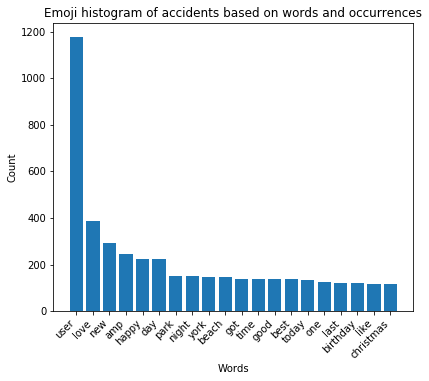

In [25]:
#Here we simply plot the distribution
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),emoji_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [26]:
# Here we multiply the frequency with the rank

In [27]:
li =  []
counter = 1
for elm in emoji_top_20_val.values():
    li.append(elm * counter)
    counter += 1

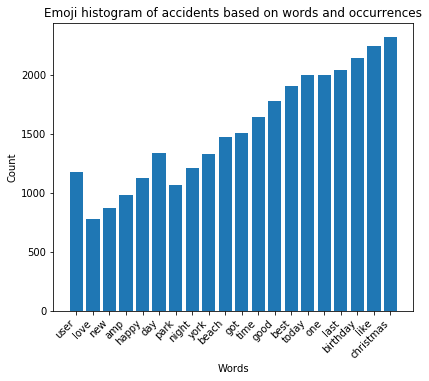

In [28]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(emoji_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [29]:
# Raw dataset
emoji_raw_val = word_frequency(emoji_words_val_txt)
emoji_raw_train = word_frequency(emoji_words_train_txt)
emoji_raw_test = word_frequency(emoji_words_test_txt)

In [30]:
thing = most_common_words(emoji_raw_val)

In [31]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

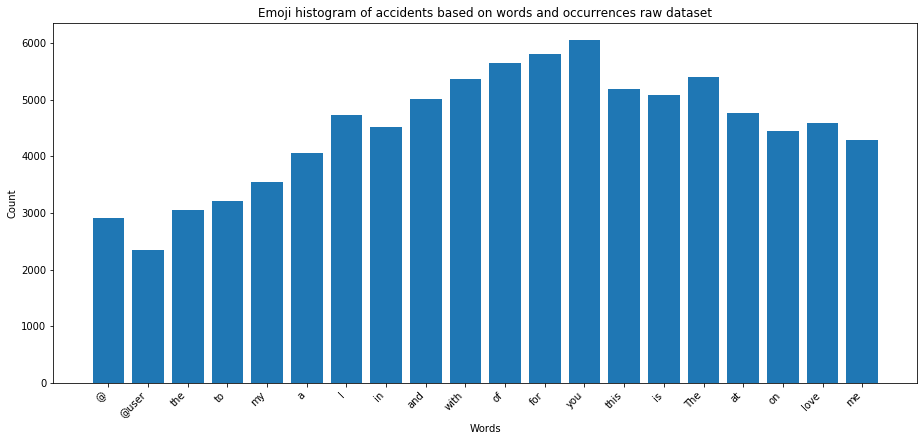

In [32]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

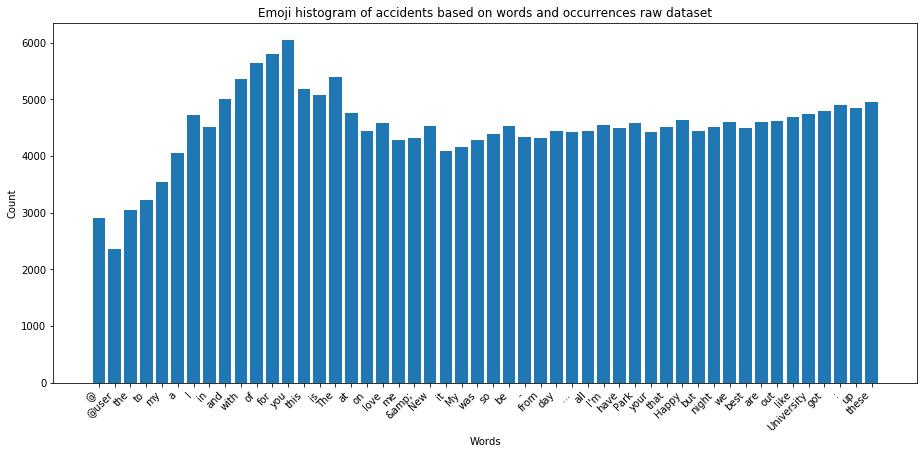

In [33]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

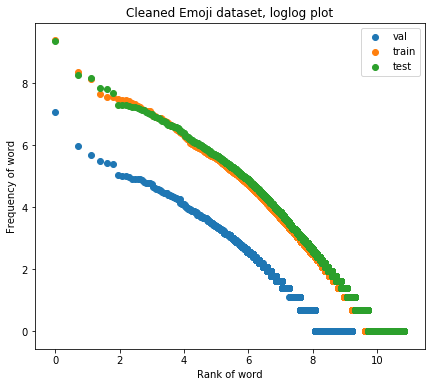

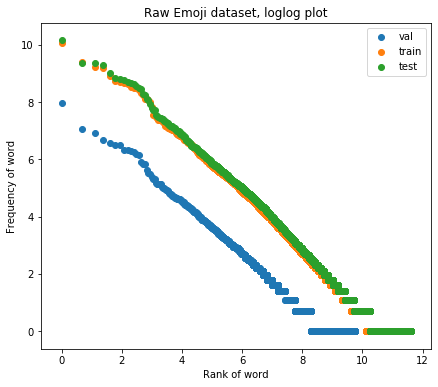

In [34]:
# Cleaned dataset:
llplot([emoji_freq_words_val, emoji_freq_words_train, emoji_freq_words_test], labels=["val", "train", "test"], title="Cleaned Emoji dataset, loglog plot")



llplot([emoji_raw_val, emoji_raw_train, emoji_raw_test], labels=["val", "train", "test"], title="Raw Emoji dataset, loglog plot")

## Type/token ratio

In [35]:
_, tokens, _, _,unique_tokens, _ ,_ = basic_statistics(emoji_text_train,printer = True)

The number of characters: 3285761
The number of tokens is: 671226
The number of sentences is: 23566
The average number of tokens per sentence is: 20
The number of unique tokens are: 45846
The tokens ratio is: 0.068
The number of total tokens after removing stopwords are: 314127


## Offensive dataset

## Size of our offensive vocabulary

In [36]:
print("Number of total words in the vocabulary " + str(len(offensive_freq_words_train)))

Number of total words in the vocabulary 16962


### Top 20 most common tokens 

In [37]:
offensive_top_20_val = top_20_most_common_words(offensive_freq_words_val)
offensive_top_20_train = top_20_most_common_words(offensive_freq_words_train)
offensive_top_20_test = top_20_most_common_words(offensive_freq_words_test)

print('Top 20 in val_text.txt:\n',offensive_top_20_val, '\n')
print('Top 20 in val_train.txt:\n',offensive_top_20_train,'\n')
print('Top 20 in val_test.txt:\n',offensive_top_20_test,'\n')

Top 20 in val_text.txt:
 {'user': 3455, 'liberals': 137, 'gun': 133, 'control': 125, 'antifa': 118, 'like': 109, 'conservatives': 107, 'maga': 98, 'people': 89, 'know': 77, 'get': 73, 'one': 71, 'trump': 69, 'think': 68, 'amp': 62, 'would': 61, 'want': 55, 'us': 52, 'going': 47, 'right': 45} 

Top 20 in val_train.txt:
 {'user': 29961, 'liberals': 1260, 'gun': 1230, 'control': 1095, 'antifa': 1047, 'like': 995, 'maga': 907, 'conservatives': 839, 'people': 830, 'amp': 615, 'get': 586, 'one': 568, 'trump': 565, 'know': 557, 'would': 507, 'think': 483, 'good': 416, 'right': 409, 'time': 349, 'us': 345} 

Top 20 in val_test.txt:
 {'user': 608, 'liberals': 81, 'conservatives': 80, 'antifa': 74, 'like': 65, 'gun': 64, 'control': 64, 'maga': 57, 'get': 51, 'one': 48, 'people': 47, 'trump': 44, 'us': 42, 'love': 38, 'want': 37, 'via': 33, 'know': 31, 'good': 31, 'going': 30, 'new': 30} 



## Top 20 least common tokens

In [38]:
offensive_least_words_val = least_common_words(offensive_freq_words_val)
offensive_least_words_train = least_common_words(offensive_freq_words_train)
offensive_least_words_test = least_common_words(offensive_freq_words_test)
print('Top 20 least common words in offensive_freq_words_val \n',offensive_least_words_val[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_train \n',offensive_least_words_train[0:20], '\n')
print('Top 20 least common words in offensive_freq_words_test \n',offensive_least_words_test[0:20], '\n')

Top 20 least common words in offensive_freq_words_val 
 [('wiiu', 1), ('console', 1), ('az', 1), ('underage', 1), ('lionsden', 1), ('affect', 1), ('hazard', 1), ('club', 1), ('finger', 1), ('aid', 1), ('constituent', 1), ('disclosure', 1), ('etiquette', 1), ('moderation', 1), ('city', 1), ('ft', 1), ('richer', 1), ('sendhim', 1), ('allegation', 1), ('teen', 1)] 

Top 20 least common words in offensive_freq_words_train 
 [('countrymen', 1), ('breitbarters', 1), ('progressing', 1), ('reads', 1), ('unto', 1), ('optic', 1), ('vetsresistsquadron', 1), ('scout', 1), ('lifetimes', 1), ('obummer', 1), ('plethora', 1), ('peruse', 1), ('lighting', 1), ('torches', 1), ('checkmarks', 1), ('verifiedhate', 1), ('lmfaoooooo', 1), ('shitbiscuit', 1), ('tempe', 1), ('licensereporters', 1)] 

Top 20 least common words in offensive_freq_words_test 
 [('ibelieveblaseyford', 1), ('libreal', 1), ('snowflake', 1), ('iran', 1), ('johnkerryiranmeeting', 1), ('angels', 1), ('runs', 1), ('homers', 1), ('connects

## Zipf's Law

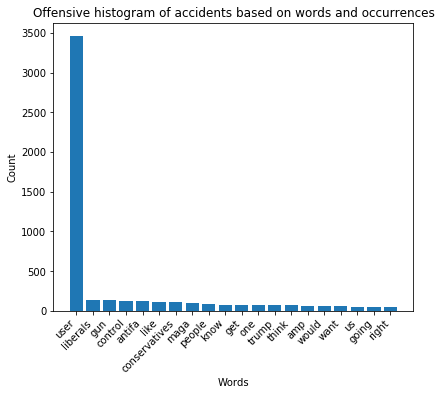

In [39]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),offensive_top_20_val.values())
fig.autofmt_xdate(rotation=45)
axes.set_title('Offensive histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [40]:
li =  []
counter = 1
for elm in offensive_top_20_val.values():
    li.append(elm * counter)
    counter += 1

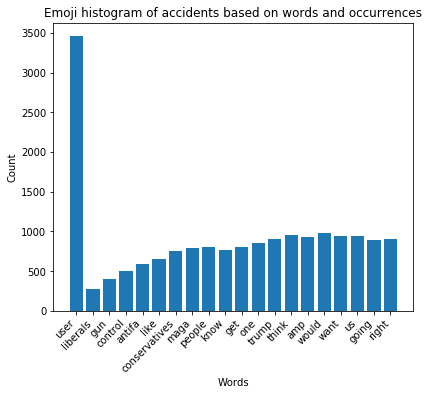

In [41]:
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(offensive_top_20_val.keys(),li)
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

In [42]:
# Raw dataset
offensive_raw_val = word_frequency(offensive_words_val_txt)
offensive_raw_train = word_frequency(offensive_words_train_txt)
offensive_raw_test = word_frequency(offensive_words_test_txt)


In [43]:
thing = most_common_words(offensive_raw_val)

In [44]:
li =  []
counter = 1
for elm in thing.values():
    li.append(elm * counter)
    counter += 1
    if counter == 51:
        break

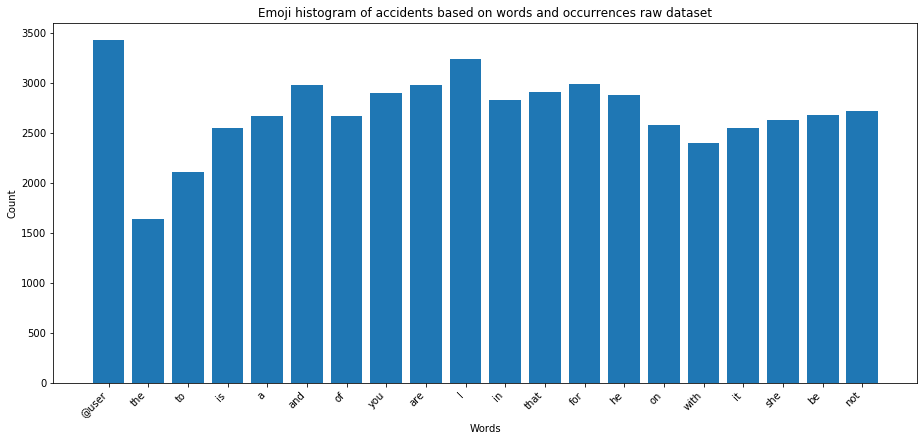

In [45]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:20],li[:20])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

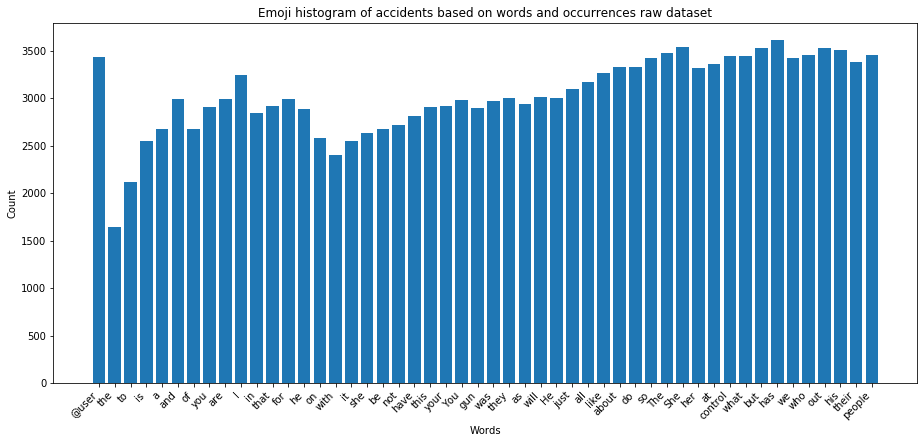

In [46]:
fig = plt.figure(figsize = (12,5))
axes = fig.add_axes([0,0,1,1])
axes.bar(list(thing.keys())[:50],li[:50])
fig.autofmt_xdate(rotation=45)
axes.set_title('Emoji histogram of accidents based on words and occurrences raw dataset')
axes.set_ylabel('Count')
axes.set_xlabel('Words');

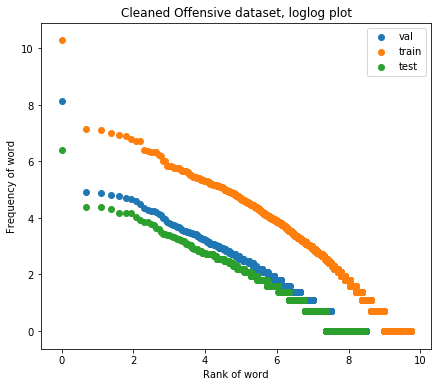

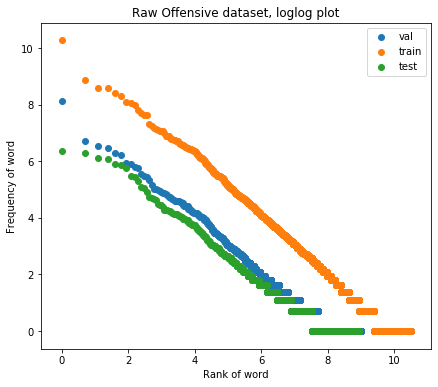

In [47]:
# Cleaned dataset:
llplot([offensive_freq_words_val, offensive_freq_words_train, offensive_freq_words_test], labels=["val", "train", "test"], title="Cleaned Offensive dataset, loglog plot")

llplot([offensive_raw_val, offensive_raw_train, offensive_raw_test], labels=["val", "train", "test"], title="Raw Offensive dataset, loglog plot")

There is an overall trend that the follows the law, however, this is has not been proven mathematicly, and our plots doesn't follow the excact distributions as described.

## Type/token ratio

In [48]:
_, tokens, _, _,unique_tokens, _ ,_ = basic_statistics(offensive_text_train,printer = True)

The number of characters: 1510503
The number of tokens is: 336416
The number of sentences is: 18122
The average number of tokens per sentence is: 14
The number of unique tokens are: 17111
The tokens ratio is: 0.051
The number of total tokens after removing stopwords are: 147302


In [49]:


train = pd.read_csv('datasets/offensive/train_text.txt', header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Training Set:"% train.columns, train.shape, len(train))


test = pd.read_csv('datasets/offensive/test_text.txt',header=None, skiprows = 0, names=['tweet'], sep='\t', quoting=3)
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (11916, 1) 11916
Test Set: (860, 1) 860


In [50]:

index_train = [x for x in range(1, len(train.values)+1)]
index_test = [x for x in range(1, len(test.values)+1)]

train.insert(loc=0, column='id', value =index_train )
test.insert(loc=0, column='id', value =index_test )

train_labels = pd.read_csv('datasets/offensive/train_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
train_labels.insert(loc=0, column='id', value=index_train)

test_labels = pd.read_csv('datasets/offensive/test_labels.txt',header=None, skiprows = 0, names=['label'], sep='\t', quoting=3)
test_labels.insert(loc=0, column='id', value =index_test )


test_df = test.merge(test_labels, on='id', how='left')
train_df = train.merge(train_labels, on='id', how='left')




In [51]:
train_df.head()

id                                              tweet  label
0   1  @user Bono... who cares. Soon people will unde...      0
1   2  @user Eight years the republicans denied obama...      1
2   3  @user Get him some line help. He is gonna be j...      0
3   4               @user @user She is great. Hi Fiona!       0
4   5  @user She has become a parody unto herself? Sh...      1

In [52]:
test_df.head()

id                                              tweet  label
0   1  #ibelieveblaseyford is liar she is fat ugly li...      1
1   2  @user @user @user I got in a pretty deep debat...      0
2   3  ...if you want more shootings and more death, ...      0
3   4  Angels now have 6 runs. Five of them have come...      0
4   5  #Travel #Movies and Unix #Fortune combined  Vi...      0

In [53]:
test_clean = clean_text(test_df, 'tweet')
train_clean = clean_text(train_df, 'tweet')

In [54]:
stop = stopwords.words('english')

train_clean['tweet'] = train_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train_clean.head()

id                                              tweet  label
0   1  bono cares soon people understand gain nothing...      0
1   2  eight years republicans denied obama picks bre...      1
2   3  get line help gonna fine game went could see p...      0
3   4                                     great hi fiona      0
4   5  become parody unto certainly taken heat well i...      1

In [55]:
stop = stopwords.words('english')
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

test_clean.head()

id                                              tweet  label
0   1  ibelieveblaseyford liar fat ugly libreal snowf...      1
1   2  got pretty deep debate friend told latinos tru...      0
2   3  want shootings death listen aclu black lives m...      0
3   4  angels 6 runs five come courtesy mike trout ho...      0
4   5  travel movies unix fortune combined visit sali...      0

In [56]:
test_clean['tweet'] = test_clean['tweet'].apply(lambda x: word_tokenize(x))
test_clean.head()

id                                              tweet  label
0   1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0

In [57]:

test_clean_offensive = test_clean.loc[test_clean['label'] == 1]
test_clean_offensive.head()
#test_clean_offensive['tweet'].to_csv('test_cleaned_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 

id                                              tweet  label
0    1  [ibelieveblaseyford, liar, fat, ugly, libreal,...      1
8    9  [grown, ass, woman, probably, 10, years, older...      1
10  11  [kavanaugh, disciple, anthony, kennedy, ed, li...      1
15  16  [apparently, committed, going, new, level, sin...      1
18  19  [50, cent, calls, joe, budden, bullshit, insta...      1

In [58]:
test_clean_nonoffensive = test_clean.loc[test_clean['label'] == 0]

#test_clean_nonoffensive['tweet'].to_csv('test_cleaned_non_off_lang_df.csv',  quoting=csv.QUOTE_NONE, escapechar=' ') 

test_clean_nonoffensive.head()

id                                              tweet  label
1   2  [got, pretty, deep, debate, friend, told, lati...      0
2   3  [want, shootings, death, listen, aclu, black, ...      0
3   4  [angels, 6, runs, five, come, courtesy, mike, ...      0
4   5  [travel, movies, unix, fortune, combined, visi...      0
5   6  [naturephotography, nature, birds, wild, wisco...      0

In [59]:
test_off_lists = test_clean_offensive['tweet'].values.tolist()
test_off_lists[0]

['ibelieveblaseyford',
 'liar',
 'fat',
 'ugly',
 'libreal',
 'snowflake',
 'sold',
 'get',
 'cash',
 'dems',
 'iran',
 'spoke',
 'johnkerryiranmeeting']

In [60]:
test_non_off_lists = test_clean_nonoffensive['tweet'].values.tolist()
test_non_off_lists[0]

['got',
 'pretty',
 'deep',
 'debate',
 'friend',
 'told',
 'latinos',
 'trump',
 'blacks',
 'trump',
 'paid',
 'supporters',
 'said',
 'mean',
 'antifa',
 'paid',
 'domestic',
 'terrorist',
 'said',
 'anti',
 'fascist',
 'said',
 'fascist',
 'kidding']